### Préparation des données

In [2]:
import sys
sys.path.append('../src/')

import dataset_prep
#liste des path :
# "../data/1416/merged1.csv"
# "../data/1416/merged2.csv"
# "../data/1416/merged3.csv"
# "../data/1416/merged4.csv"
# "../data/1416/merged5.csv"
# "../data/1416/data1416.csv"
# "../data/0709/merged1.csv"
dataset_path = "../../data/0709/merged1.csv"


# liste des colomnes
# receiver, sender, sender pseudo, message Id, scenario , a supprimé
# merged1 : "sendTime", "rcvTime", "pos_y_rec_f", "pos_y_rec", "pos_x_rec_f", "pos_x_rec", "pos_y_send_f", "pos_y_send", "pos_x_send_f", "pos_x_send", "label"
# merged2 : "spd_x_send", "max_speed2", "max_speed1", "distance", "distRealSR2", "distRealSR1", "diffSpdSR2", "diffSpdSR1", "difSpeed", "deltaSpd2", "label"
# merged3 : "sendTime", "rcvTime", "pos_x_rec_f", "max_speed1", "distRealSR2", "distRealSR1", "deltaSpd2", "deltaSpd1", "deltaPos2", "deltaPos1", "label"
# merged4 : "pos_x_rec_f", "nb_packets_sent", "distance", "distRealSR2", "distRealSR1", "deltaPos2", "deltaPos1", "spd_y_send", "spd_x_send", "sendTime", "label"
# merged5 : "pos_x_rec_f", "pos_x_rec", "nb_packets_sent", "distance", "distRealSR2", "distRealSR1", "deltaPos2", "deltaPos1", "sendTime", "rcvTime", "label"
# 0709 : "time_diff", "nb_packets_sent", "max_speed1", "max_speed2", "hed_noise_x", "sendTime", "rcvTime", "hed_noise_y", "label"
usecols = ["time_diff", "nb_packets_sent", "max_speed1", "max_speed2", "hed_noise_x", "sendTime", "rcvTime", "hed_noise_y", "label"]

data = dataset_prep.import_dataset(dataset_path, usecols)
dataset_prep.clean_dataset(data)
X_train, X_test, y_train, y_test = dataset_prep.data_preparation(data, test_size=0.1)

Nombre de lignes avant nettoyage :  1048575
Nombre de lignes après nettoyage :  1013977


# Classifier LightGBM 

https://www.kaggle.com/code/prashant111/lightgbm-classifier-in-python

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html


In [201]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.2)


In [215]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier(boosting_type='gbdt', learning_rate=0.2, n_estimators=1000, objective='binary')
clf.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=30)

/home/cytech/.local/lib/python3.8/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.506625
[2]	valid_0's binary_logloss: 0.387637
[3]	valid_0's binary_logloss: 0.302597
[4]	valid_0's binary_logloss: 0.239365
[5]	valid_0's binary_logloss: 0.191142
[6]	valid_0's binary_logloss: 0.153782
[7]	valid_0's binary_logloss: 0.124432
[8]	valid_0's binary_logloss: 0.101212
[9]	valid_0's binary_logloss: 0.0825531
[10]	valid_0's binary_logloss: 0.0676811
[11]	valid_0's binary_logloss: 0.0556697
[12]	valid_0's binary_logloss: 0.0459344
[13]	valid_0's binary_logloss: 0.0380728
[14]	valid_0's binary_logloss: 0.0316689
[15]	valid_0's binary_logloss: 0.0264587
[16]	valid_0's binary_logloss: 0.0222116
[17]	valid_0's binary_logloss: 0.0187138
[18]	valid_0's binary_logloss: 0.0158648
[19]	valid_0's binary_logloss: 0.013539
[20]	valid_0's binary_logloss: 0.0116434
[21]	valid_0's binary_logloss: 0.0100198
[22]	valid_0's binary_logloss: 0.00873723
[23]	valid_0's binary_logloss: 0.00764344
[24]	valid_0's binary_logloss: 0.00676333
[25]	valid_0's binary_logloss: 

LGBMClassifier(learning_rate=0.2, n_estimators=1000, objective='binary')

In [216]:
# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score, classification_report

accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

print(classification_report(y_test, y_pred))

LightGBM Model accuracy score: 0.9999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44420
           1       1.00      1.00      1.00     56978

    accuracy                           1.00    101398
   macro avg       1.00      1.00      1.00    101398
weighted avg       1.00      1.00      1.00    101398



In [208]:
#prediction with train set
y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

print(classification_report(y_train, y_pred_train))


Training-set accuracy score: 0.9843
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    319868
           1       0.98      0.99      0.99    410195

    accuracy                           0.98    730063
   macro avg       0.98      0.98      0.98    730063
weighted avg       0.98      0.98      0.98    730063



In [205]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.9843
Test set score: 0.9843


<AxesSubplot:>

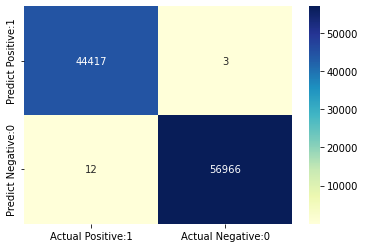

In [218]:
# compute the confusion matrix
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')



# Other model using lightgbm

multiclasse classification

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.train.html

In [211]:
# TODO
# multiclass classification

# defining parameters 

params = {
    'boosting': 'gbdt',
    'objective': 'binary',
    'num_leaves': 31,
    'learning_rate' : 0.2
}

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
# fitting the model
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=30,
                 num_boost_round=1000)

/home/cytech/.local/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 410195, number of negative: 319868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2026
[LightGBM] [Info] Number of data points in the train set: 730063, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.561862 -> initscore=0.248724
[LightGBM] [Info] Start training from score 0.248724
[1]	valid_0's binary_logloss: 0.506625
Training until validation scores don't improve for 30 rounds
[2]	valid_0's binary_logloss: 0.387637
[3]	valid_0's binary_logloss: 0.302597
[4]	valid_0's binary_logloss: 0.239365
[5]	valid_0's binary_logloss: 0.191142
[6]	valid_0's binary_logloss: 0.153782
[7]	valid_0's binary_logloss: 0.124432
[8]	valid_0's binary_logloss: 0.101212
[9]	valid_0's binary_logloss: 0.0825531
[10]	valid_0's binary_logl

LightGBM Model accuracy score: 0.9999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44420
           1       1.00      1.00      1.00     56978

    accuracy                           1.00    101398
   macro avg       1.00      1.00      1.00    101398
weighted avg       1.00      1.00      1.00    101398



<AxesSubplot:>

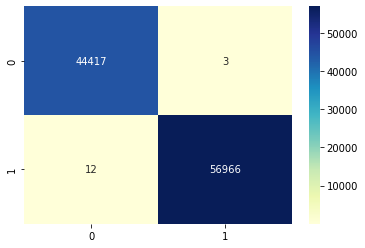

In [217]:
from numpy import around, argmax

lgb_test = lgb.Dataset(X_test, y_test)

# prediction
y_pred = around(model.predict(X_test))
#y_pred = argmax(model.predict(X_test), axis=1)

print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')